Code

In [1]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plt.style.use('ggplot')

In [3]:
data = pd.read_csv('file_name.csv')
data.head(5)

,Text,Language
0,ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദ...,Malayalam
1,ഭൗതികപ്രതിഭാസങ്ങളും ജീവനും പ്രകൃതിയുടെ ഘടകങ്ങള...,Malayalam
2,മനുഷ്യനിർമിതമായ വസ്തുക്കളെ പ്രകൃതിയുടെ ഭാഗമായി...,Malayalam
3,അവയെ കൃത്രിമം എന്ന് വിശേഷിപ്പിക്കുന്നുഅഭിപ്രായ...,Malayalam
4,പ്രകൃതി എന്ന പദം പ്രപഞ്ചത്തെയും അതിലെ സമസ്ത പ്...,Malayalam


In [30]:
#data = data.drop(['Unnamed: 0'], axis = 1)

In [5]:
data["Language"].value_counts()

Telugu       600
Malayalam    594
Tamil        469
Kannada      369
Name: Language, dtype: int64

In [6]:
X = data['Text']
X.sample(5)

961     இல்லை, மன்னிக்கவும், நான் ஏற்கனவே சில திட்டங்க...
988                இல்லை, நான் நன்றாக இருக்கிறேன், நன்றி.
1166    ಗಂಭೀರವಾಗಿ ಹಾಗೆ ಹೃದಯಕ್ಕೆ ತೆಗೆದುಕೊಳ್ಳಬೇಡಿ ಆದ್ದರಿ...
1540    ప్రకాష్ జవదేకర్ (స్వతంత్ర్య ) – సమాచార, ప్రసార...
1417    ಆದರೆ ತಿನ್ನಲಾಗದ ಎಲ್ಲದಕ್ಕೂ ಎದೆಗುಂದಿದಳು ಅವಳು ಶೀಘ್...
Name: Text, dtype: object

In [7]:
Y = data['Language']
Y.sample(5)

1005        Tamil
78      Malayalam
662         Tamil
1337      Kannada
1664       Telugu
Name: Language, dtype: object

In [8]:
data['Language']

0       Malayalam
1       Malayalam
2       Malayalam
3       Malayalam
4       Malayalam
          ...    
2027       Telugu
2028       Telugu
2029       Telugu
2030       Telugu
2031       Telugu
Name: Language, Length: 2032, dtype: object

In [9]:
#from sklearn.preprocessing import LabelEncoder
#import re
le = LabelEncoder()
Y = le.fit_transform(Y)

In [10]:
data_list = []
# iterating through all the text
for text in X:
    
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

C:\Users\abhis\AppData\Local\Temp\ipykernel_27012\333482127.py:7: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


In [11]:
#from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(2032, 2735)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42,test_size=0.30)

In [13]:
models = []
models.append(('Logistic Regression', LogisticRegression()))

models.append(('SVM', SVC(kernel = 'linear')))

models.append(('Multinominal Naive Bayes', MultinomialNB()))

In [14]:
#from sklearn import metrics
results = []
names = []
confusion_matrix_a = []
y_pred_matrix = []
#scoring = 'accuracy'
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    #classification_r = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,np.rint(y_pred)) #confusion_matrix
    print("Accuracy of ",name," is : ",accuracy)
    results.append(accuracy)
    names.append(name)
    confusion_matrix_a.append(cm)
    y_pred_matrix.append(y_pred)
    

Accuracy of  Logistic Regression  is :  0.9344262295081968
Accuracy of  SVM  is :  0.9245901639344263
Accuracy of  Multinominal Naive Bayes  is :  0.9918032786885246


<Figure size 640x480 with 0 Axes>

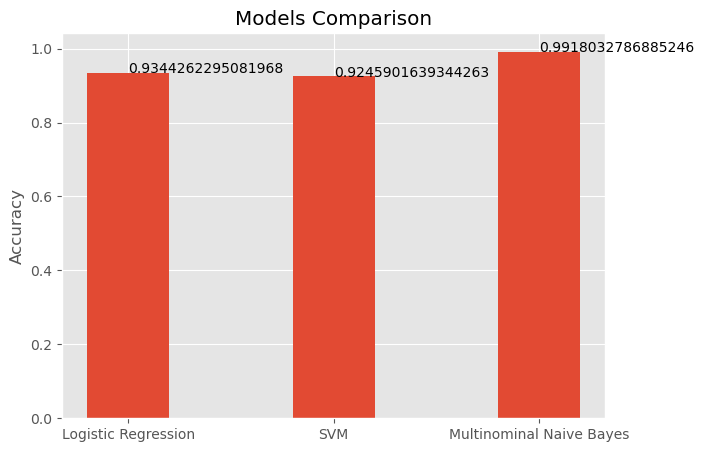

In [15]:
fig = plt.figure()
fig = plt.figure(figsize = (7, 5))
plt.bar(names,results,width=0.4)
plt.text(0,results[0],results[0])
plt.text(1,results[1],results[1])
plt.text(2,results[2],results[2])
plt.title('Models Comparison')
plt.ylabel("Accuracy")
plt.show()

In [16]:
#plt.figure()
'''
i = 0
for c in confusion_matrix:
  plt.title(names[i])
  sns.heatmap(c, annot=True)
  plt.show()
  i+=1
'''

'\ni = 0\nfor c in confusion_matrix:\n  plt.title(names[i])\n  sns.heatmap(c, annot=True)\n  plt.show()\n  i+=1\n'

In [17]:
language_variables = ['Kan','Mal','Tel','Tam']

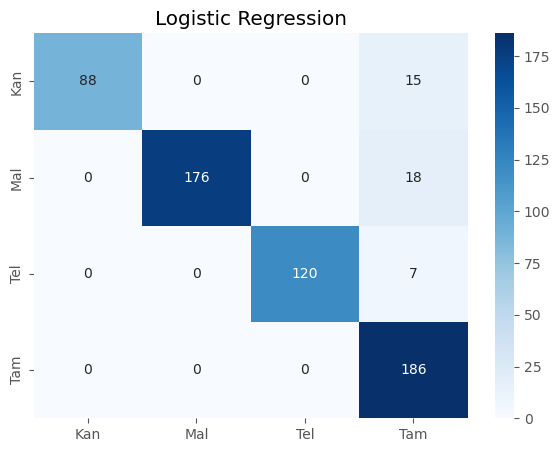

In [18]:
#LR
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix_a[0],annot = True,fmt='d', cmap='Blues',xticklabels=language_variables, yticklabels = language_variables)
#sns.set(xlabel='X-Axis', ylabel='Y-Axis')
plt.title(names[0])
plt.show()


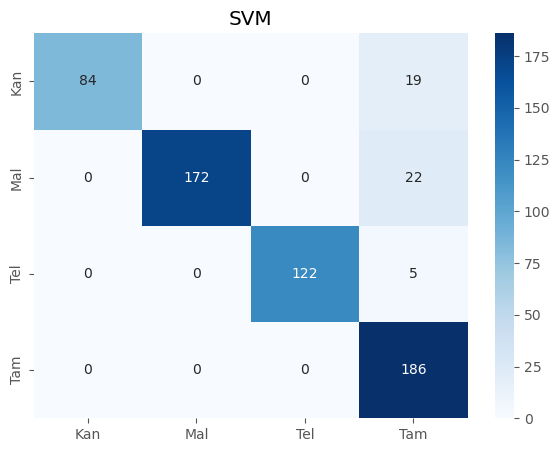

In [19]:
#SVM
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix_a[1],annot = True,fmt='d', cmap='Blues',xticklabels=language_variables, yticklabels = language_variables)
plt.title(names[1])
plt.show()

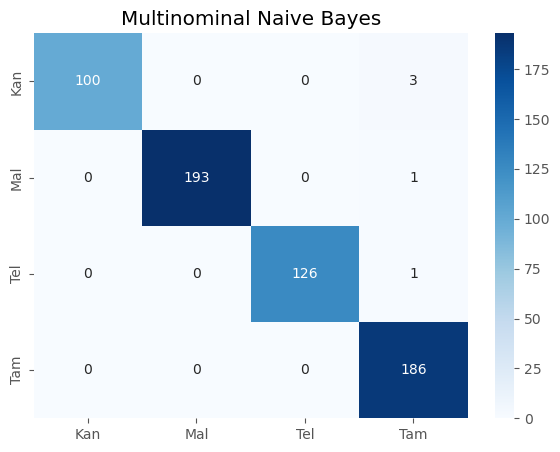

In [20]:
#MNB
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix_a[2],annot = True,fmt='d', cmap='Blues',xticklabels=language_variables, yticklabels = language_variables)
plt.title(names[2])
plt.show()

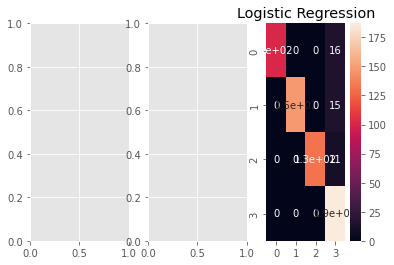

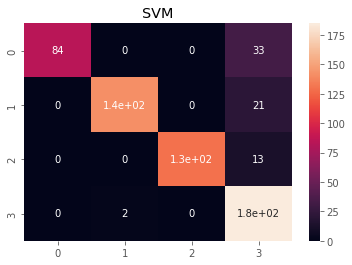

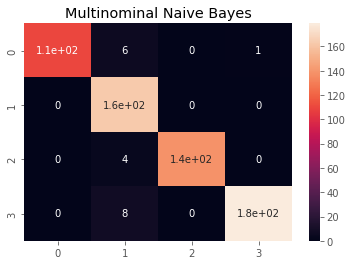

In [ ]:
'''
fig, (m1,m2,m3) = plt.subplots(1,3)
i = 0
for c in confusion_matrix:
  plt.title(names[i])
  sns.heatmap(c, annot=True)
  plt.show()
  i+=1
'''  

In [ ]:
#target_variables = ['LR','SVM','MNB']

In [21]:
#Logistic regression performance metrics:
LR_Cr = classification_report(y_pred_matrix[0],y_pred,target_names = language_variables)
print(LR_Cr)

#y_pred_matrix

              precision    recall  f1-score   support

         Kan       0.88      1.00      0.94        88
         Mal       0.91      1.00      0.95       176
         Tel       0.95      1.00      0.98       120
         Tam       1.00      0.85      0.92       226

    accuracy                           0.94       610
   macro avg       0.94      0.96      0.95       610
weighted avg       0.95      0.94      0.94       610



In [22]:
#SVM
SVM_Cr = classification_report(y_pred_matrix[1],y_pred,target_names = language_variables)
print(SVM_Cr)

              precision    recall  f1-score   support

         Kan       0.84      1.00      0.91        84
         Mal       0.89      1.00      0.94       172
         Tel       0.97      1.00      0.98       122
         Tam       1.00      0.82      0.90       232

    accuracy                           0.93       610
   macro avg       0.92      0.96      0.94       610
weighted avg       0.94      0.93      0.93       610



In [23]:
#MNB
MNB_Cr = classification_report(y_pred_matrix[2],y_pred,target_names = language_variables)
print(MNB_Cr)

              precision    recall  f1-score   support

         Kan       1.00      1.00      1.00       100
         Mal       1.00      1.00      1.00       193
         Tel       1.00      1.00      1.00       126
         Tam       1.00      1.00      1.00       191

    accuracy                           1.00       610
   macro avg       1.00      1.00      1.00       610
weighted avg       1.00      1.00      1.00       610



In [24]:
#Linear Regression - LR
#Support Vector Machine - SVM
#Multinomial Naive Bayes - MNB
LR = models[0][1]
SVM = models[1][1]
MNB = models[2][1]


In [25]:
def prediction(text,m):
  x = cv.transform([text]).toarray()
  l = m.predict(x)
  l = le.inverse_transform(l)
  print("The language is ",l)

In [26]:
prediction("సమానులును నగుదురు. వారు వివేచన-అంతఃకరణ",LR)  #tel

The language is  ['Telugu']


In [27]:
prediction("உங்களை சந்தித்ததில் மகிழ்ச்ச",SVM)  #tam

The language is  ['Tamil']


In [28]:
prediction("ഇന്ന് നിങ്ങൾക്കെങ്ങനെയുണ്ട്",MNB)  #mal

The language is  ['Malayalam']


In [29]:
prediction("ನನ್ನ ಹೆಸರು ಪ್ರಣವ್",MNB)  #Kan

The language is  ['Kannada']
